In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, Adam
import keras.applications as A
import matplotlib.pyplot as plt

In [3]:
train_path = "input/train"
test_path = "input/test"
inputs = (50, 50, 3)

vgg = A.vgg16.VGG16(include_top=False, weights=None, input_shape=inputs)
model = Sequential()
# Add the vgg convolutional base model
model.add(vgg)

# Add fully connected layers
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                8208      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
__________

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255,)

# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(50, 50),
    batch_size=train_batchsize,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(50, 50),
    batch_size=val_batchsize,
    class_mode='categorical',
    shuffle=False
)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 14s 1s/step - loss: 0.5823 - acc: 0.6667 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 0.5579 - acc: 0.7000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.6343 - acc: 0.6000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.4708 - acc: 0.7000 - val_loss: 6.3855 - val_acc: 0.5000
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.6557 - acc: 0.5667 - val_loss: 5.2113 - val_acc: 0.5000
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.6787 - acc: 0.6500 - val_loss: 3.8921 - val_acc: 0.5000
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.6343 - acc: 0.6000 - val_loss: 1.4586 - val_acc: 0.5000
Epoch 8/10
1

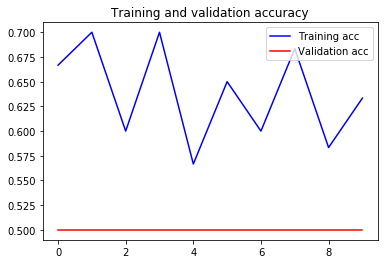

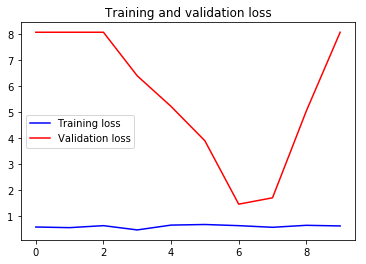

In [15]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('cnn_acccuracy.png')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('cnn_acccuracy.png')

plt.show()